In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_ind, chi2_contingency

# Load the dataset
df = pd.read_excel('book1.xlsx')
# Summary statistics dikha
df = df.reindex(range(9426))
print(df.isnull().sum())
numerical_summary = df.describe()
df_no_duplicates = df.loc[:,df.columns.duplicated()]
print("\nDataFrame without duplicate columns:")
print(df_no_duplicates)
df['Row id'] = df['Row id'].fillna(0)
df['Row id'] = df['Row id'].astype(int)
df['Unit Price'] = df['Row id'].fillna(1)
df['Unit Price'] = df['Row id'].astype(int)
# Display the first few rows and summary statistics
print(df.head());
print(df.describe());




Row id                  9421
order priorty           9421
Discount                9421
Unit Price              9421
Shiping cost            9421
Customer id             9421
Customer Name           9421
Ship Mode               9421
Customer Segment        9421
Product Category        9421
Region                  9421
State or Province       9421
City                    9421
Postal Code             9421
Order Date              9421
Ship Date               9421
Profit                  9421
Quantity ordered new    9421
Sales                   9421
Order Id                9421
dtype: int64

DataFrame without duplicate columns:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,

In [49]:
df.describe()

,Row id,Discount,Unit Price,Shiping cost,Customer id,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order Id
count,9426.000000,5.00000,9426.000000,5.000000,5.000000,5.00000,5,5,5.000000,5.00000,5.000000,5.000000
mean,11.533418,0.03000,11.533418,2.736000,2.800000,90597.00000,2011-07-11 04:48:00,2011-09-23 04:48:00,185.186460,5.60000,311.428000,88523.200000
min,0.000000,0.00000,0.000000,0.500000,2.000000,60101.00000,2010-07-07 00:00:00,2011-07-08 00:00:00,-47.640000,2.00000,5.900000,88522.000000
25%,0.000000,0.01000,0.000000,0.930000,3.000000,98221.00000,2011-07-27 00:00:00,2011-07-27 00:00:00,-30.510000,4.00000,13.010000,88523.000000
50%,0.000000,0.01000,0.000000,2.500000,3.000000,98221.00000,2011-07-27 00:00:00,2011-07-28 00:00:00,1.320000,7.00000,41.640000,88523.000000
75%,0.000000,0.03000,0.000000,3.600000,3.000000,98221.00000,2011-07-27 00:00:00,2011-07-28 00:00:00,4.560000,7.00000,49.920000,88523.000000
max,23088.000000,0.10000,23088.000000,6.150000,3.000000,98221.00000,2012-05-28 00:00:00,2012-05-30 00:00:00,998.202300,8.00000,1446.670000,88525.000000
std,502.361058,0.04062,502.361058,2.275902,0.447214,17047.78226,NaN,NaN,455.016668,2.50998,634.891144,1.095445


In [50]:

# Handle missing values

df['Customer id'] = df['Customer id'].fillna(0)
df['Customer id'] = df['Customer id'].astype(int)
df['Postal Code'] = df['Postal Code'].fillna(0)
df['Postal Code'] = df['Postal Code'].astype(int)
df['Quantity ordered new'] = df['Quantity ordered new'].fillna(0)
df['Quantity ordered new'] = df['Quantity ordered new'].astype(int)
# Create any new columns needed for analysis
Container_types = ['Box', 'Crate', 'Pallet', 'Envelope', 'Plastic Bag']
df['Product Container'] = np.random.choice(Container_types, size=len(df))
product_types = ['Laptop', 'Gold', 'Chair','Food','Mobile']
df['Product Name'] = np.random.choice(product_types, size=len(df))
sub_categories = ['Electronics', 'Clothing', 'Furniture', 'Groceries', 'Beauty and Personal']
df['Product Sub-Category'] = np.random.choice(sub_categories, size=len(df))
Product_Base_Margin = [2.6,12.4,1.5,3.6,4.3]
df['Product_Base_Margin'] = np.random.choice(Product_Base_Margin, size=len(df))


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row id                9426 non-null   int64         
 1   order priorty         5 non-null      object        
 2   Discount              5 non-null      float64       
 3   Unit Price            9426 non-null   int64         
 4   Shiping cost          5 non-null      float64       
 5   Customer id           9426 non-null   int64         
 6   Customer Name         5 non-null      object        
 7   Ship Mode             5 non-null      object        
 8   Customer Segment      5 non-null      object        
 9   Product Category      5 non-null      object        
 10  Region                5 non-null      object        
 11  State or Province     5 non-null      object        
 12  City                  5 non-null      object        
 13  Postal Code       

In [52]:
print(df.shape)

(9426, 24)


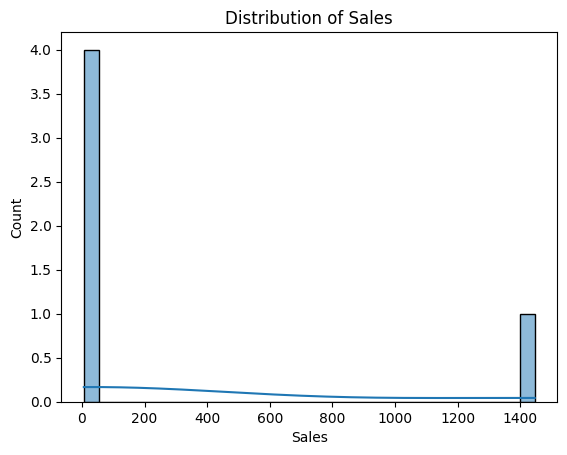

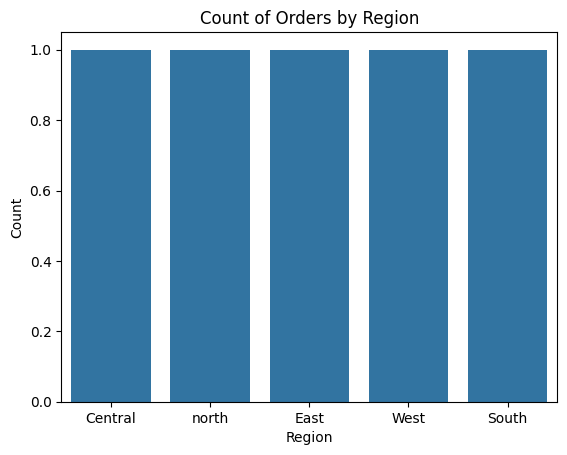

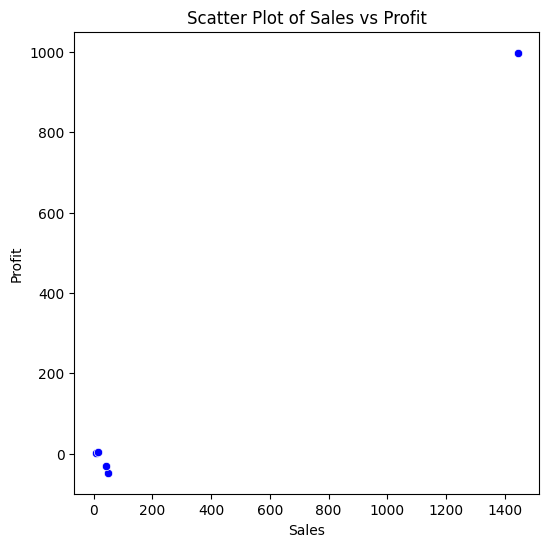

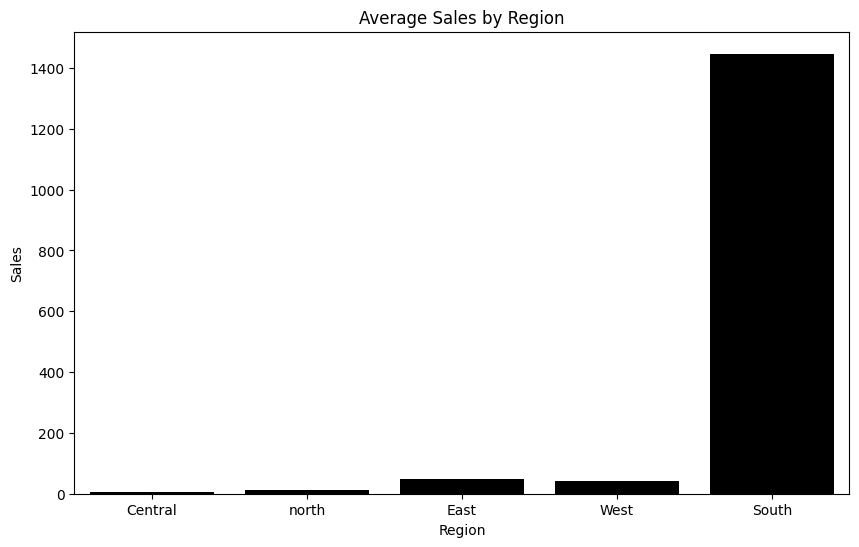

In [53]:

# Univariate analysis

sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()
sns.countplot(x='Region', data=df)
plt.title('Count of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()
# Bivariate analysis
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, color='blue')
plt.title('Scatter Plot of Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales',color='black' ,data=df)
plt.title('Average Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()


Summary Statistics:
             Row id  Discount  Unit Price  Shiping cost  Customer id  \
count      5.000000   5.00000    5.000000      5.000000     5.000000   
mean   21742.800000   0.03000   44.814000      2.736000     2.800000   
min    18606.000000   0.00000    2.840000      0.500000     2.000000   
25%    20847.000000   0.01000    2.880000      0.930000     3.000000   
50%    23086.000000   0.01000    5.680000      2.500000     3.000000   
75%    23087.000000   0.03000    6.680000      3.600000     3.000000   
max    23088.000000   0.10000  205.990000      6.150000     3.000000   
std     2003.908356   0.04062   90.116108      2.275902     0.447214   

       Postal Code           Order Date            Ship Date      Profit  \
count      5.00000                    5                    5    5.000000   
mean   90597.00000  2011-07-11 04:48:00  2011-09-23 04:48:00  185.186460   
min    60101.00000  2010-07-07 00:00:00  2011-07-08 00:00:00  -47.640000   
25%    98221.00000  2011-07

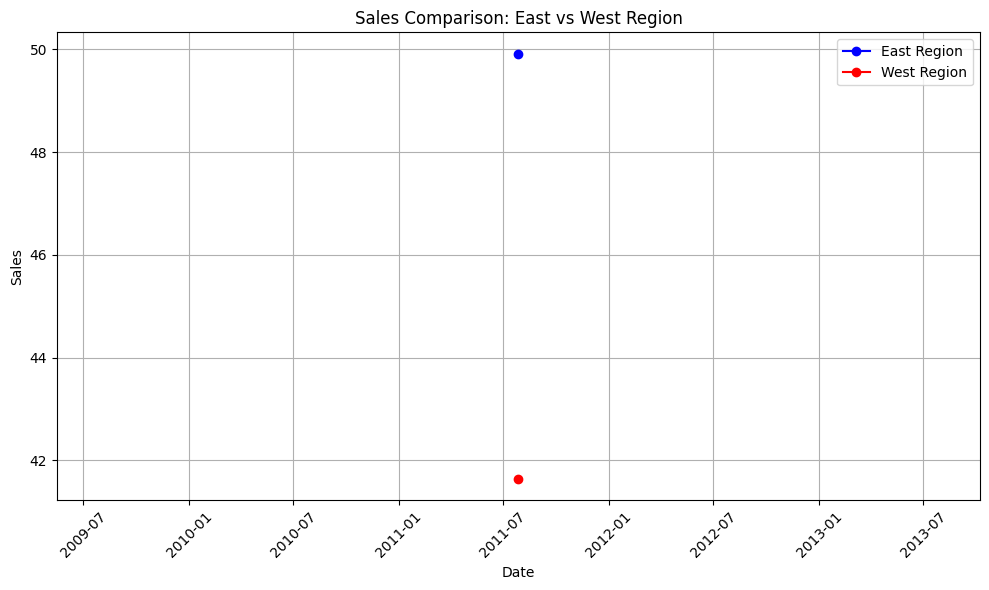

T-statistic: -6.725382459813658
P-value: 0.00014876701753650516
Degrees of freedom: 8.0


In [54]:

# Summary statistics for key variables
import numpy as np
df = pd.read_excel('book1.xlsx')
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)
summary_stats_specific = df[['Sales', 'Product Category']]
print("\nSummary Statistics for 'Sales' and 'Product Category':")
print(summary_stats_specific)

# Grouped statistics
df = pd.read_excel('book1.xlsx')
data = pd.read_excel('book1.xlsx')
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
east_region = data[data['Region'] == 'East']
west_region = data[data['Region'] == 'West']
plt.figure(figsize=(10, 6))
plt.plot(east_region['Ship Date'], east_region['Sales'], marker='o', linestyle='-', color='b', label='East Region')
plt.plot(west_region['Ship Date'], west_region['Sales'], marker='o', linestyle='-', color='r', label='West Region')
plt.title('Sales Comparison: East vs West Region')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Perform T-test using statsmodels
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind
group1 = np.array([23, 21, 18, 24, 22])
group2 = np.array([30, 29, 31, 32, 28])
t_stat, p_value, df = ttest_ind(group1, group2, usevar='pooled')  # Use 'pooled' for equal variances, 'unequal' otherwise
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {df}')








### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [56]:

from scipy.stats import ttest_ind
# Example: T-test for sales in different regions
import pandas as pd
from scipy.stats import ttest_ind
data = pd.read_excel('book1.xlsx')
df = pd.DataFrame(data)
sales_east = df[df['Region'] == 'East']['Sales']
sales_south = df[df['Region'] == 'South']['Sales']
print("Sales data for East region:")
print(sales_east)
print("\nSales data for South region:")
print(sales_south)
t_stat, p_value = ttest_ind(sales_east, sales_south, equal_var=False)  
print("\nT-statistic:", t_stat)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference in sales between North and South regions.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in sales between North and South regions.")
# Perform T-test using statsmodels

import numpy as np
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind
Group1 = np.array([12, 67, 58, 45, 20])
Group2 = np.array([33, 59, 32, 32, 18])
t_stat, p_value, df = ttest_ind(Group1, Group2)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {df}')

# Example: Chi-square test for independence between Ship Mode and Customer Segment
import pandas as pd
from scipy.stats import chi2_contingency
df = pd.read_excel('book1.xlsx')
contingency_table = pd.crosstab(df['Ship Mode'], df['Customer Segment'])
print("Contingency Table:")
print(contingency_table)
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Ship Mode and Customer Segment.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Ship Mode and Customer Segment.")



Sales data for East region:
2    49.92
Name: Sales, dtype: float64

Sales data for South region:
4    1446.67
Name: Sales, dtype: float64

T-statistic: nan
p-value: nan

Fail to reject the null hypothesis: There is no significant difference in sales between North and South regions.
T-statistic: 0.4463604050335365
P-value: 0.6671716925754282
Degrees of freedom: 8.0
Contingency Table:
Customer Segment     Corporate
Ship Mode                     
Express Air                  2
Regular Air                  2
delivery truck mode          1

Chi-square Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Expected Frequencies Table:
[[2.]
 [2.]
 [1.]]

Fail to reject the null hypothesis: There is no significant association between Ship Mode and Customer Segment.


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1114: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1114: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


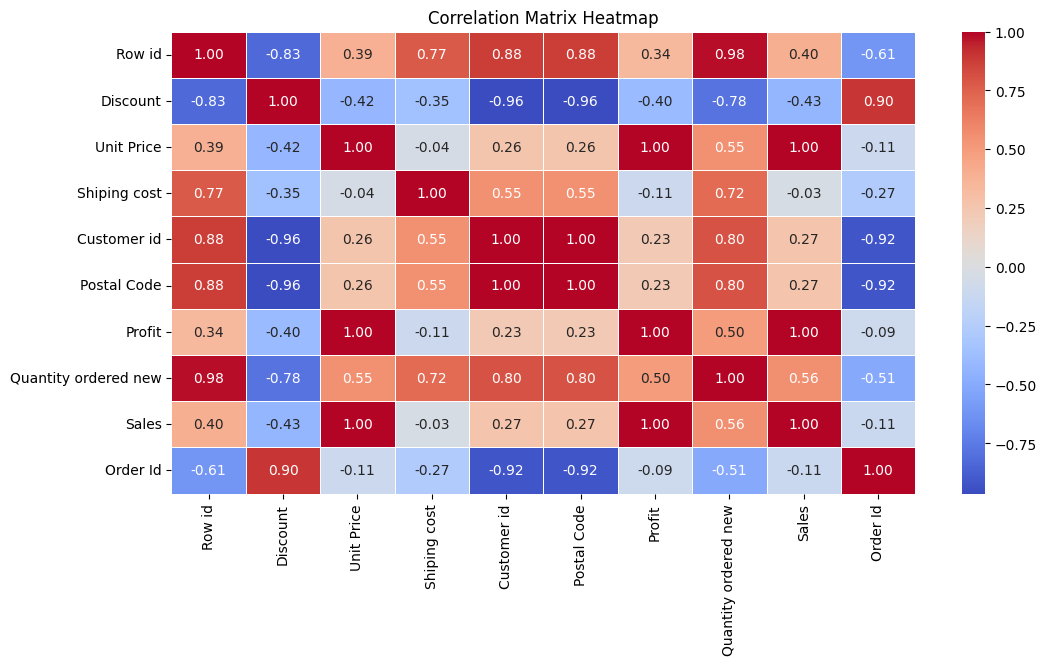

In [57]:
# Selecting only numeric columns for correlation matrix

df = pd.read_excel('book1.xlsx')
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



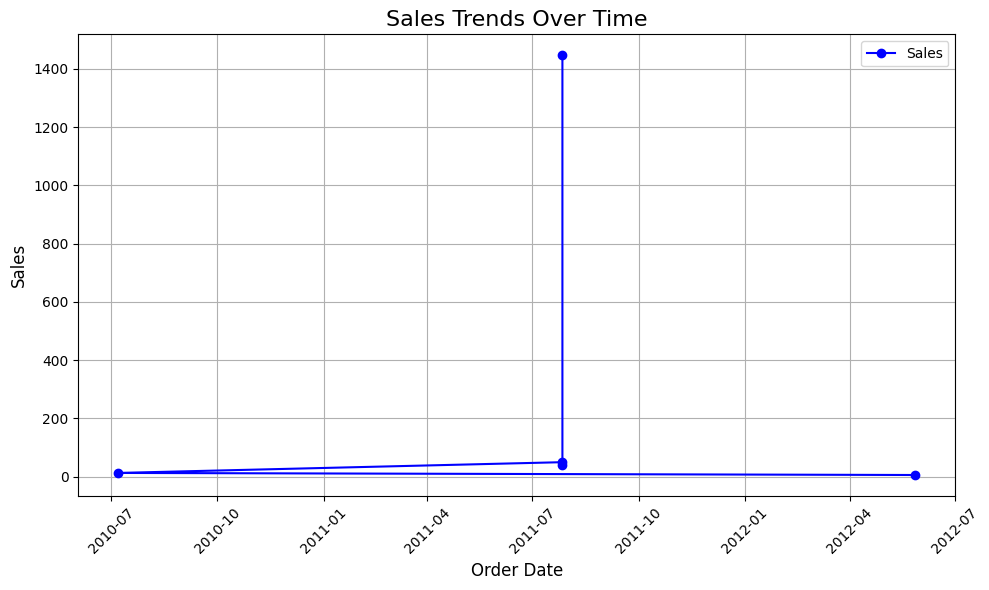

            sales
date             
2024-01-01      0
2024-01-02      1
2024-01-03      2
2024-01-04      3
2024-01-05      4
            sales
date             
2024-01-31    465
2024-02-29   1305
2024-03-31   2325
2024-04-30   3045


In [58]:

# Plotting sales trends over time
data = pd.read_excel('book1.xlsx')
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], marker='o', linestyle='-', color='b', label='Sales')
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend()
plt.tight_layout() 
plt.show()
# Resample sales data by month
data = {
    'date': pd.date_range(start='2024-01-01', periods=120, freq='D'),
    'sales': range(120)
}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)
print(df.head())
monthly_sales = df.resample('ME').sum()
print(monthly_sales)



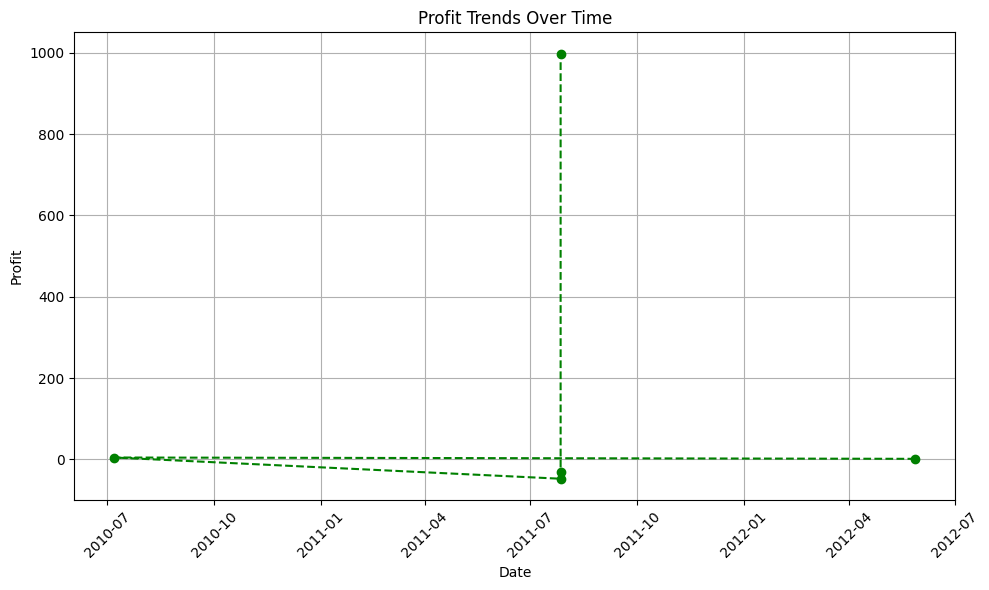

In [8]:
# Plotting profit trends over time
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_excel('book1.xlsx')
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Order Date'])
plt.figure(figsize=(10, 6))
plt.plot(df['Order Date'], df['Profit'], marker='o', linestyle='--', color='g')
plt.title('Profit Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


Top-performing product categories by sales:
  Product Category  total_sales  total_profit
2       Technology      1446.67      998.2023
1  Office Supplies        60.55      -24.6300
0        Furniture        49.92      -47.6400

Top-performing product categories by profit:
  Product Category  total_sales  total_profit
2       Technology      1446.67      998.2023
1  Office Supplies        60.55      -24.6300
0        Furniture        49.92      -47.6400


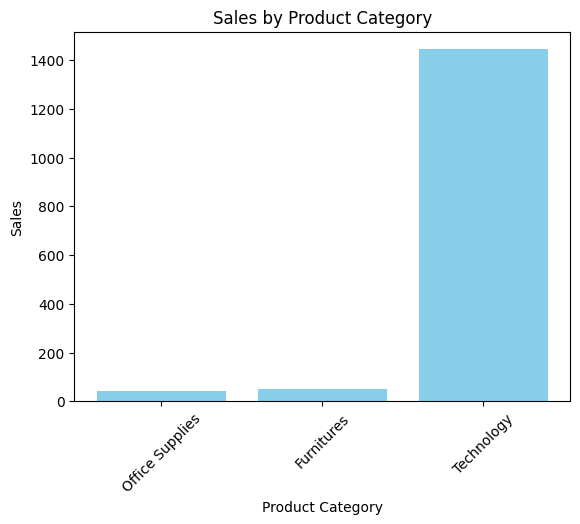

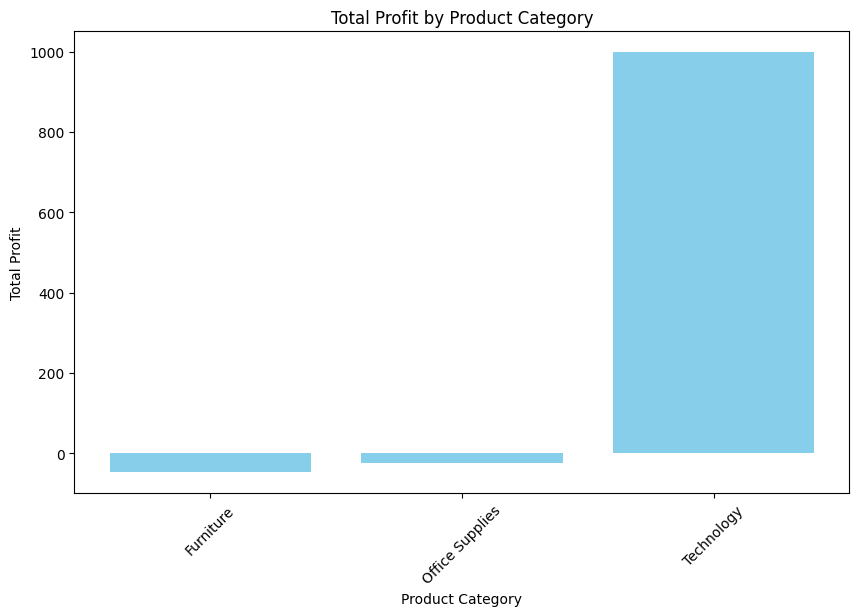

In [59]:

# Identifying top-performing product categories based on total sales and profit
import pandas as pd
data = pd.read_excel('book1.xlsx')
df = pd.DataFrame(data)
grouped = df.groupby('Product Category').agg(
    total_sales=pd.NamedAgg(column='Sales', aggfunc='sum'),
    total_profit=pd.NamedAgg(column='Profit', aggfunc='sum')
).reset_index()
sorted_by_sales = grouped.sort_values(by='total_sales', ascending=False)
sorted_by_profit = grouped.sort_values(by='total_profit', ascending=False)
print("Top-performing product categories by sales:")
print(sorted_by_sales)
print("\nTop-performing product categories by profit:")
print(sorted_by_profit)
# Plotting total sales by product category
data = {'Product Category': ['Office Supplies', 'Office Supplies', 'Furnitures','Office Supplies','Technology'],
        'Sales': [5.90,13.01,49.92,41.64,1444.4]}
#data = pd.read_excel('book1.xlsx')
sales_by_category = pd.DataFrame(data)
plt.bar(sales_by_category['Product Category'], sales_by_category['Sales'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Sales by Product Category')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()
# Plotting total profit by product category
data = pd.read_excel('book1.xlsx')
total_profit_by_category = pd.DataFrame(data)
total_profit_by_category = df.groupby('Product Category')['Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))  # Optional: adjust figure size
plt.bar(total_profit_by_category['Product Category'], total_profit_by_category['Profit'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Product Category')
plt.xticks(rotation=45)  
plt.show()




In [60]:

# Generating summary statistics for each region
summary_statistics = df.groupby('Region').agg(
    mean_sales=('Sales', 'mean'),
    total_sales=('Sales', 'sum'),
    count_sales=('Sales', 'count'),
    std_sales=('Sales', 'std')
)


# Display summary statistics


print(summary_statistics)

         mean_sales  total_sales  count_sales  std_sales
Region                                                  
Central        5.90         5.90            1        NaN
East          49.92        49.92            1        NaN
South       1446.67      1446.67            1        NaN
West          41.64        41.64            1        NaN
north         13.01        13.01            1        NaN


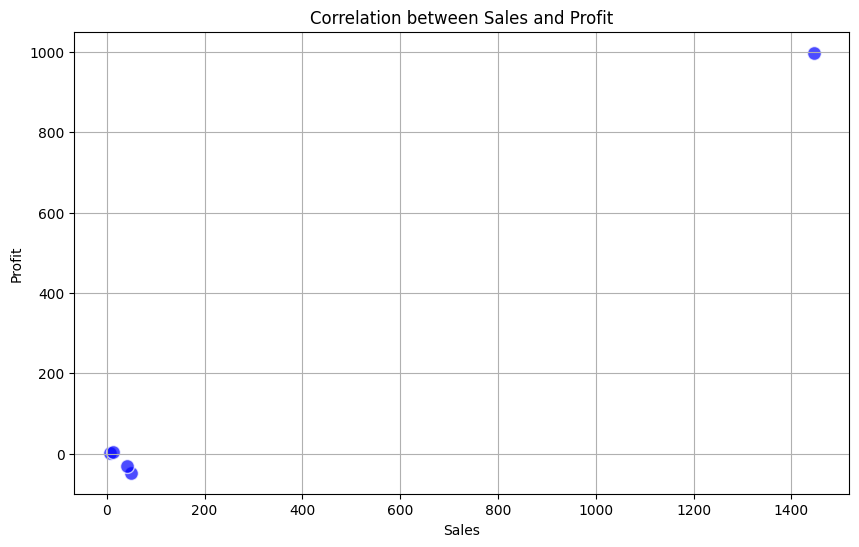

Correlation coefficient between Sales and Profit: 1.00
Correlation coefficient between Sales and Profit: 1.00


In [61]:

# Visualizing the correlation between sales and profit
df = pd.read_excel('book1.xlsx')
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], color='blue', alpha=0.7, edgecolors='w', s=100)
plt.title('Correlation between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()
# Calculate correlation coefficient
correlation = df['Sales'].corr(df['Profit'])
print(f'Correlation coefficient between Sales and Profit: {correlation:.2f}')
correlation = df['Sales'].corr(df['Profit'])
# Display the correlation coefficient
print(f'Correlation coefficient between Sales and Profit: {correlation:.2f}')





In [62]:

# Analyzing seasonal sales trends
import pandas as pd
data = pd.read_excel('book1.xlsx')
df = pd.DataFrame(data)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
monthly_sales = df.resample('ME')
print(monthly_sales)
# Grouping sales data by month and year
import pandas as pd
data = pd.read_excel('book1.xlsx')
df = pd.DataFrame(data)
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
monthly_sales = df.groupby(['year', 'month']).agg({'Sales': 'sum'}).reset_index()
monthly_sales.columns = ['Year', 'Month', 'Total Sales']
print(monthly_sales)




DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, origin=start_day]
   Year  Month  Total Sales
0  2010      7        13.01
1  2011      7      1538.23
2  2012      5         5.90


Order Date
2010-07-31      13.01
2010-08-31       0.00
2010-09-30       0.00
2010-10-31       0.00
2010-11-30       0.00
2010-12-31       0.00
2011-01-31       0.00
2011-02-28       0.00
2011-03-31       0.00
2011-04-30       0.00
2011-05-31       0.00
2011-06-30       0.00
2011-07-31    1538.23
2011-08-31       0.00
2011-09-30       0.00
2011-10-31       0.00
2011-11-30       0.00
2011-12-31       0.00
2012-01-31       0.00
2012-02-29       0.00
2012-03-31       0.00
2012-04-30       0.00
2012-05-31       5.90
Freq: ME, Name: Sales, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20932\140333804.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Sales', data = df , palette="coolwarm")


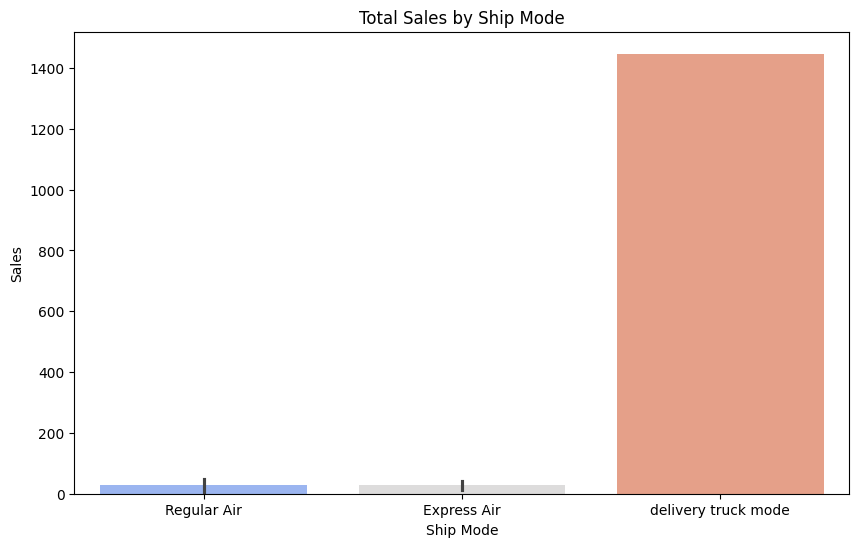

In [63]:

# Comparing sales across different ship modes
data = pd.read_excel('book1.xlsx');
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)
monthly_sales = data['Sales'].resample('ME').sum()
print(monthly_sales)
# Plotting total sales by ship mode
plt.figure(figsize=(10, 6))
df = df.fillna(0)
sns.barplot(x='Ship Mode', y='Sales', data = df , palette="coolwarm")
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()






In [64]:
# Ensure column names are clean
data = pd.read_excel('book1.xlsx')
df = pd.DataFrame(data)
# Cleaning column names
df.columns = df.columns.str.strip()        
df.columns = df.columns.str.lower()        
df.columns = df.columns.str.replace(' ', '_')  
df.columns = df.columns.str.replace('[#]', '', regex=True)  
print("Cleaned Column Names:")
print(df.columns)
# Ensure 'Ship Date' column is datetime type
data = pd.read_excel('book1.xlsx')
df = pd.DataFrame(data)
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.set_index('Ship Date', inplace=True)
monthly_sales = df.resample('ME')
print("Sales Data Resampled by Month:")
print(monthly_sales)
# Dropping rows where 'Ship Date' couldn't be converted
data = pd.read_excel('book1.xlsx')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')
print(data['Ship Date'].dtype)  
print(data.head())

# Resample sales data by month
import pandas as pd
data = pd.read_excel('book1.xlsx')
df = pd.DataFrame(data)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
monthly_sales = df.resample('ME')
print(monthly_sales)










Cleaned Column Names:
Index(['row_id', 'order_priorty', 'discount', 'unit_price', 'shiping_cost',
       'customer_id', 'customer_name', 'ship_mode', 'customer_segment',
       'product_category', 'region', 'state_or_province', 'city',
       'postal_code', 'order_date', 'ship_date', 'profit',
       'quantity_ordered_new', 'sales', 'order_id'],
      dtype='object')
Sales Data Resampled by Month:
DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, origin=start_day]
datetime64[ns]
   Row id  order priorty  Discount  Unit Price  Shiping cost  Customer id  \
0   18606  Not Specified      0.10        2.88          0.50            2   
1   20847           High      0.01        2.84          0.93            3   
2   23086  Not Specified      0.03        6.68          6.15            3   
3   23087  Not Specified      0.01        5.68          3.60            3   
4   23088  Not Specified      0.00      205.99          2.50            3   

      Cus